# Amazon Fine Food Reviews 


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review

In [1]:
#Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the file
data=pd.read_csv("C:\\Users\\HP\\Downloads\\amazon-fine-food-reviews\\Reviews.csv")


In [3]:
#find type
print(data.dtypes)
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
# find numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
# view of categorical variables
print(data[categorical].head())
# view of numerical variables
print(data[numerical].head())

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object
There are 5 categorical variables
There are 5 numerical variables
    ProductId          UserId                      ProfileName  \
0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arr

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
data.shape

(568454, 10)

In [9]:
#check missing values
data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [10]:
#drop all rows that have any NaN values
data=data.dropna()     

In [11]:
#shape
data.shape

(568411, 10)

In [12]:
# Drop a row by condition
data=data[data.Score != 3]
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
#shape
data.shape

(525773, 10)

In [14]:
data['Positivity'] = np.where(data['Score'] > 3, 1, 0)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [15]:
data=data.drop("Score",axis=1)

In [16]:
# neg_data = data[data['Positivity'] == 0][0:2500]
# pos_data = data[data['Positivity'] == 1][0:2500]
# sample_data = pd.concat([neg_data, pos_data])
# data['Positivity'].value_counts()

In [17]:
#Sorting data according to ProductId in ascending order
sorted_data = data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [18]:
#Deduplication of entries
final = sorted_data.drop_duplicates(subset = {"UserId","ProfileName","Time","Text"}, keep ='first', inplace=False)
final.shape

(364161, 10)

In [19]:
#(HelpfulnessNumerator)/(HelpfulnessNumerator+HelpfulnessDenominator)>0 and if not remove
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
final.shape

(364159, 10)

In [20]:
final['Positivity'].value_counts()

1    307054
0     57105
Name: Positivity, dtype: int64

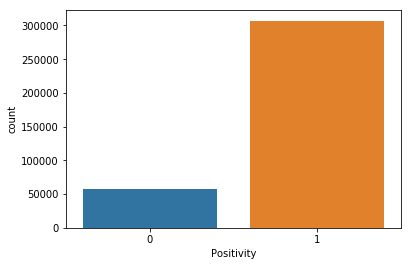

In [21]:
sns.countplot(final['Positivity'])

In [22]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(data['Id'].size*1.0)*100

69.2616395288461

I removed 30% of data as wastage

In [23]:
final=final[0:5000]

In [25]:
final.shape

(5000, 10)

In [26]:
final

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Positivity
150522,150523,0006641040,A2P4F2UO0UMP8C,"Elizabeth A. Curry ""Lovely Librarian""",0,0,1096675200,MMMM chicken soup....,Summary: A young boy describes the usefulness...,1
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,1
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,1210809600,A classic,Get the movie or sound track and sing along wi...,1
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",1
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,1
150507,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,1
150509,150510,0006641040,AM1MNZMYMS7D8,Dr. Joshua Grossman,0,0,1348358400,Professional Mentoring,TITLE: Chicken Soup with Rice<br />AUTHOR: Mau...,1
150510,150511,0006641040,A1C9K534BCI9GO,Laura Purdie Salas,0,0,1344211200,Charming and childlike,"A charming, rhyming book that describes the ci...",1
150511,150512,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,1338249600,Must have.,I set aside at least an hour each day to read ...,1
150512,150513,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,1325721600,A classic,I remembered this book from my childhood and g...,1


In [27]:
# Cleaning the texts
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem.wordnet import WordNetLemmatizer

In [28]:
from nltk import stem
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [30]:
final.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Positivity'],
      dtype='object')

In [31]:
from tqdm import tqdm
corpus = []
for sentance in tqdm(final["Text"].values):
    #remove the tags
    cleanr = re.compile('<.*?>')
    review = re.sub(cleanr, ' ', sentance)
    review = decontracted(review)
    #remove the numeric values
    review = re.sub('[^a-zA-Z]', ' ', review)
    #remove the special characters
    review = re.sub(r'[?|!|\'|"|#]',r'',review)
    review = re.sub(r'[.|,|)|(|\|/]',r' ',review)
    #convert all to lower
    review = review.lower()
    #splilt the sentence to words
    review = review.split()
    #remove the stop words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    final.append(corpus)
print(ps.stem('Loved'))

  0%|                                                 | 0/5000 [00:00<?, ?it/s]c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
100%|██████████████████████████████████████| 5000/5000 [34:13<00:00,  2.32it/s]


love


In [33]:
import pickle
filename = "C:\\Users\\HP\\Desktop\\MLDATASETS\\data\\model\\AFFRR1.clf"
fileobj = open(filename, 'wb')
pickle.dump(final, fileobj)
print("Saved model to disk")

Saved model to disk


In [34]:
 #adding a column of CleanedText which displays the data after pre-processing of the test
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Positivity
150522,150523,0006641040,A2P4F2UO0UMP8C,"Elizabeth A. Curry ""Lovely Librarian""",0,0,1096675200,MMMM chicken soup....,Summary: A young boy describes the usefulness...,1
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,1
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,1210809600,A classic,Get the movie or sound track and sing along wi...,1
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",1
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,1


In [36]:
y= final['Positivity'].values
X = final["Text"].values

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [38]:
# Creating the Bag of Words model by n_gram
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500,ngram_range=(1,2) )
X_train = cv.fit_transform(X_train)
X_test=cv.transform(X_test)

In [40]:
print(type(X_train))
print(type(X_test))
print(X_train.shape)
print(y_train.shape)


<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
(4000, 1500)
(4000,)


In [41]:
X_train=X_train.toarray()
X_test=X_test.toarray()

In [42]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict(X_train)

0.696
              precision    recall  f1-score   support

           0       0.30      0.76      0.43       149
           1       0.94      0.69      0.79       851

   micro avg       0.70      0.70      0.70      1000
   macro avg       0.62      0.72      0.61      1000
weighted avg       0.85      0.70      0.74      1000



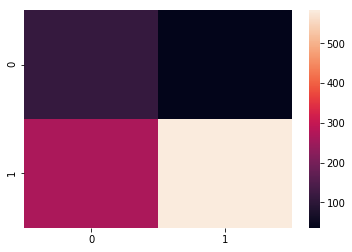

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



0.736
              precision    recall  f1-score   support

           0       0.40      0.88      0.55       738
           1       0.96      0.70      0.81      3262

   micro avg       0.74      0.74      0.74      4000
   macro avg       0.68      0.79      0.68      4000
weighted avg       0.86      0.74      0.76      4000



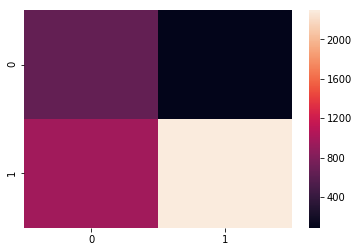

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_train, y_pred1)
sns.heatmap(cm)
print(accuracy_score(y_train,y_pred1))
print(classification_report(y_train,y_pred1))



In [48]:
#************************ 10 fold cross validation **************************************************************

In [49]:
klist = list(range(1,30,2))
klist

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

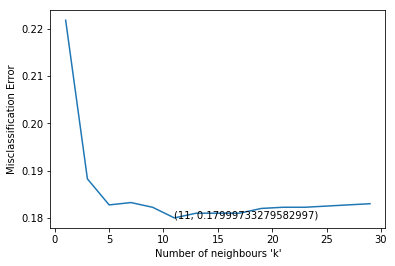

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
cv_scores = []
for k in klist:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
    cv_scores.append(scores.mean())
    
error = [1 - x for x in cv_scores]
optimal_k = klist[error.index(min(error))]
plt.plot(klist, error)
xy = (optimal_k, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of neighbours 'k'")
plt.ylabel("Misclassification Error")
plt.show()

In [53]:
optimal_k

11

In [55]:
# Accuracy on test data;
knn = KNeighborsClassifier(n_neighbors=optimal_k, n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 11 is 85.300000%


In [32]:
#***********************  TF_IDF   ********************************

In [ ]:
#tf_idf_vect 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
X_train = tf_idf_vect.fit_transform(X_train)
X_test=tf_idf_vect.transform(X_test)

In [ ]:
X_train.get_shape()

In [ ]:
# Fitting Logistic regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [23]:
#upsampling
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = final[final.Positivity==1]
df_minority = final[final.Positivity==0]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=307054,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

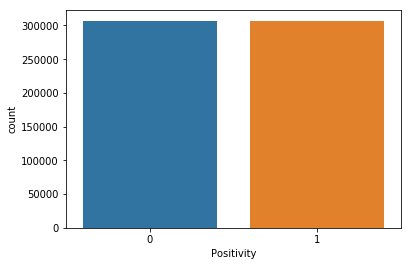

In [24]:
sns.countplot(df_upsampled["Positivity"])

In [25]:
# Sorting data based on time
df_upsampled["Time"] = pd.to_datetime(df_upsampled["Time"], unit = "s")
df_upsampled= df_upsampled.sort_values(by = "Time")

In [26]:
# Cleaning the texts
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem.wordnet import WordNetLemmatizer

In [27]:
from nltk import stem
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [28]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [31]:
df_upsampled.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Positivity
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1999-10-08,EVERY book is educational,this witty little book makes my son laugh at l...,1
150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1999-10-25,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,1
451855,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1999-12-02,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,1
374358,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1999-12-06,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",1
451854,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,2000-01-03,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,1


In [ ]:
from tqdm import tqdm
corpus = []
for sentance in tqdm(dataset["Review"].values):
    #remove the tags
    cleanr = re.compile('<.*?>')
    review = re.sub(cleanr, ' ', sentance)
    review = decontracted(review)
    #remove the numeric values
    review = re.sub('[^a-zA-Z]', ' ', review)
    #remove the special characters
    review = re.sub(r'[?|!|\'|"|#]',r'',review)
    review = re.sub(r'[.|,|)|(|\|/]',r' ',review)
    #convert all to lower
    review = review.lower()
    #splilt the sentence to words
    review = review.split()
    #remove the stop words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    dataset.append(corpus)
print(ps.stem('Loved'))

In [105]:
# Combining all the  
import re
from tqdm import tqdm
from bs4 import BeautifulSoup
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train.values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    re.sub(r'[?|!|\'|"|#]',r' ',sentance)
    re.sub(r'[.|,|)|(|\|/]',r' ',sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|█████████████████████████████████| 491286/491286 [18:11<00:00, 450.13it/s]


In [119]:
y_train.shape

(491286,)

In [106]:
import pickle
filename = "C:\\Users\\HP\\Desktop\\MLDATASETS\\data\\model\\AFFRR1.clf"
fileobj = open(filename, 'wb')
pickle.dump(preprocessed_reviews, fileobj)

In [107]:
# printing some random reviews
 preprocessed_reviews[1]

'taste scent gourmet instant coffee rich inviting definitely taste vanilla add appropriate amount water coffee tastes great instant otherwise likely end weak brew packaging not quite easy open use teeth make dent stick single serving size may not generate enough coffee coffee drinkers good chance diluting happened first time used compromising taste would like drink coffee use sticks previous reviewer pointed may quick pick shot afternoon'

In [118]:
#BoW X_train

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() #in scikit-learn
final_counts =count_vect.fit_transform(X_train)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaargh', 'aaaaaaaaaaaaaaaaacccccccckkkkkk']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (122822, 62078)
the number of unique words  62078


In [111]:
#BoW X_test

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() #in scikit-learn
final_counts1=count_vect.transform(X_test)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)


print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['00', '000', '0000', '000001', '000013', '0001', '0004', '000iu', '000mg', '001']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (122822, 62078)
the number of unique words  62078


In [112]:
klist = list(range(1,30,2))
klist

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [116]:
print(y_train.shape)
print(X_train.shape)
print(final_counts.shape)

(491286,)
(491286,)
(122822, 62078)


In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
cv_scores = []
for k in klist:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, final_counts, y_train, cv=10, scoring='accuracy', n_jobs=-1)
    cv_scores.append(scores.mean())

ValueError: Found input variables with inconsistent numbers of samples: [122822, 491286]

In [ ]:
error = [1 - x for x in cv_scores]
optimal_k = klist[error.index(min(error))]
plt.plot(klist, error)
xy = (optimal_k, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of neighbours 'k'")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Accuracy on test data;
knn = KNeighborsClassifier(n_neighbors=optimal_k, n_jobs=-1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

In [38]:
#bi-gram, tri-gram and n-gram

#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
# please do read the CountVectorizer documentation http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# you can choose these numebrs min_df=10, max_features=5000, of your choice
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
final_bigram_counts = count_vect.fit_transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (364159, 5000)
the number of unique words including both unigrams and bigrams  5000


In [39]:
#tf_idf
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['aa', 'aaa', 'aaaaa', 'aaah', 'aafco', 'ab', 'aback', 'abandon', 'abandoned', 'abbey']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (364159, 203031)
the number of unique words including both unigrams and bigrams  203031


In [40]:
#10 fold cross validation

In [41]:
klist = list(range(1,30,2))
klist

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
cv_scores = []
for k in klist:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, final_counts, final['Positivity'], cv=10, scoring='accuracy', n_jobs=-1)
    cv_scores.append(scores.mean())
    
error = [1 - x for x in cv_scores]
optimal_k = klist[error.index(min(error))]
plt.plot(klist, error)
xy = (optimal_k, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of neighbours 'k'")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
pip install BeautifulSoup4

In [103]:
from bs4 import BeautifulSoup

ModuleNotFoundError: No module named 'bs4'

In [ ]:
y=final['Positivity']

In [67]:
#drop positivity
X=final.drop(columns=['Positivity'], axis=1, inplace=True)

KeyError: "['Positivity'] not found in axis"

KeyError: "['Positivity'] not found in axis"

In [ ]:
import nltk

In [1]:
from nltk.corpus import stopwords

In [2]:
print(stopwords)

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>


In [3]:
stopwords

<WordListCorpusReader in 'C:\\Users\\HP\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>